# Dimensionality Reduction

When looking at data and plotting results, we can never go beyond three dimensions in our
data, and usually find two dimensions easier to interpret. In addition, we have already seen
the curse of dimensionality means that the higher the number of dimensions
we have, the more training data we need. Further, the dimensionality is an explicit factor for
the computational cost of many algorithms. These are some of the reasons why dimensionality
reduction is useful. However, it can also remove noise, significantly improve the results
of the learning algorithm, make the dataset easier to work with, and make the results
easier to understand.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 3, 2
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['font.size'] = 8

## Linear Discriminant Analysis (LDA)
- The covariance matrix can tell us about the scatter within a dataset, which is the amount of spread that there is within the data. The way to find this scatter is to multiply
the covariance by the $p_c$ , the probability of the class (that is, the number of datapoints
there are in that class divided by the total number). Adding the values of this for all of the
classes gives us a measure of the **within-class scatter** of the dataset:

\begin{align}
S_W = \sum_{c \in classes} \sum_{j \in c} p_c(x_j - \mu_c)(x_j - \mu_c)^T .
\end{align}

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
data = iris.data
labels = iris.target
target_ids = np.unique(labels)#labels = array([0, 1, 2])
Ndata = np.shape(data)[0]
Sw = np.zeros((4, 4))
sb = 0
mc = np.mean(data, axis=0)

C = np.cov(np.transpose(data))
# Loop over classes
classes = np.unique(labels)
for i in range(len(classes)):
# Find relevant datapoints
    indices = np.squeeze(np.where(labels==classes[i]))
    d = np.squeeze(data[indices,:])
    classcov = np.cov(d.T)
    Sw += np.float(np.shape(indices)[0])/Ndata * classcov
    m = np.mean(d, axis=0)
    sb += np.dot( (m-mc).reshape(4,1) , (m-mc).reshape(1,4) )/3
    print 'Sw: \n',Sw

print 'sb\n',sb,'\n'
print C - Sw

Sw: 
[[0.04141633 0.03343265 0.00537959 0.00351565]
 [0.03343265 0.0483932  0.00389388 0.00381224]
 [0.00537959 0.00389388 0.01003537 0.00189932]
 [0.00351565 0.00381224 0.00189932 0.00383129]]
Sw: 
[[0.13022721 0.06182721 0.06634558 0.02210884]
 [0.06182721 0.08121633 0.0314449  0.01754694]
 [0.06634558 0.0314449  0.08364082 0.02626667]
 [0.02210884 0.01754694 0.02626667 0.01686667]]
Sw: 
[[0.26500816 0.09308163 0.16744218 0.03847347]
 [0.09308163 0.11588435 0.0552381  0.03342313]
 [0.16744218 0.0552381  0.18517007 0.0425415 ]
 [0.03847347 0.03342313 0.0425415  0.04201088]]
sb
[[ 0.42141422 -0.13022667  1.10109778  0.47575378]
 [-0.13022667  0.073184   -0.37370133 -0.14994933]
 [ 1.10109778 -0.37370133  2.91095822  1.24605422]
 [ 0.47575378 -0.14994933  1.24605422  0.53736089]] 

[[ 0.42068535 -0.13235009  1.10624015  0.47843033]
 [-0.13235009  0.07211967 -0.37695085 -0.15140434]
 [ 1.10624015 -0.37695085  2.92800935  1.25384598]
 [ 0.47843033 -0.15140434  1.25384598  0.54040343]]


If our dataset is easy to separate into classes, then this within-class scatter should be
small, so that each class is tightly clustered together. However, to be able to separate the
data, we also want the distance between the classes to be large. This is known as the **between-
classes scatter** and is a significantly simpler computation, simply looking at the difference
in the means:

\begin{align}
S_B = \sum_{c \in classes} (\mu_c - \mu)(\mu_c - \mu)^T .
\end{align}


In [3]:
Sb = C - Sw

The argument about good separation suggests that datasets that are easy to separate into the different classes
should have  $S_B /S_W$ as large as possible.

The projection of
the data can be written as $z = w^T \cdot x$ for datapoint $x$. 

Replacing $x_j$ with $w^T \cdot x_j$, we can use some linear algebra to get:

\begin{align}
\sum_{c \in classes} \sum_{j \in c}
p_c(w^T \cdot (x_j - \mu_c))(w^{T} \cdot (x_j - \mu_c))^T = w^T S_W w
\end{align}

\begin{align}
\sum_{c \in classes}
w^T (\mu_c - \mu)(\mu_c - \mu)^Tw = w^T S_B w .
\end{align}

So our ratio of within-class and between-class scatter looks like:

\begin{align}
\frac{w^T S_W w}{w^T S_B w}.
\end{align}

In order to find the maximum value of this with respect to $w$, we differentiate it and set
the derivative equal to 0. This tells us that:

\begin{align}
\frac{S_B w(w^TS_W w)-S_W w(w^T S_B w)}{(w^T S_W w)^2}S_B w = 0 .
\end{align}

So we just need to solve this equation for w and we are done. We start with a little bit
of rearranging to get:

\begin{align}
S_Ww = \frac{w^T S_W w}{w^T S_B w}S_B w.
\end{align}

Finding the minimum requires computing the generalised eigenvectors of $S_W^{-1} S_B$

In [4]:
evals,evecs = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))

In [5]:
print np.linalg.inv(Sw).dot(Sb)

[[ -2.99753234   1.03446995  -7.91107272  -3.37888911]
 [ -5.54545658   2.11017676 -14.90561732  -6.29698729]
 [  7.92118614  -2.82697492  21.06840824   8.97631876]
 [ 10.52401558  -3.36743571  27.61482325  11.87787436]]


In [6]:
print evecs.dot(np.linalg.inv(Sw).dot(Sb)).dot(evecs.T)

[[ 19.36739692   1.90793526  -7.45325919 -15.59113551]
 [ -4.57143335  -0.33690072   1.77846921   3.80794739]
 [ -8.90087313  -0.84024502   3.42328384   7.20521713]
 [ 15.4052517    1.49874302  -5.92678847 -12.44453673]]


In [7]:
print evecs.T.dot(Sb).dot(evecs)/evecs.T.dot(Sw).dot(evecs)

[[ 3.18253543e+01  6.95652174e+00 -3.20000000e+01 -0.00000000e+00]
 [ 7.57038123e+00  2.60418315e-01  1.42224013e-01  2.12365591e-01]
 [-5.00312500e+01  1.40650141e-01 -1.34228188e-02 -1.34228188e-02]
 [-1.92857143e+00  2.72255068e-01 -1.34228188e-02 -1.34228188e-02]]


In [8]:
evals

array([ 3.18253543e+01,  2.60418315e-01, -1.34228188e-02, -1.34228188e-02])

In [9]:
evals,evecs = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))
indices = np.argsort(evals)
indices = indices[::-1]
evecs = evecs[:,indices]
evals = evals[indices]
w = evecs[:,:2]
lda = np.dot(data,w)

In [10]:
def pl_sc(target_ids, n):
    colors = ['navy', 'turquoise', 'darkorange']

    for i, c, label in zip(target_ids, colors,iris.target_names):
        plt.scatter(n[i == labels, 0], n[i == labels, 1], c = c, edgecolors='black', s=285,label=label, marker='.')
    plt.grid(alpha=0.5)
    plt.legend()
    plt.show()

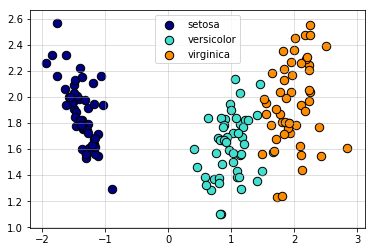

In [11]:
pl_sc(target_ids, lda)

0.0015230178833


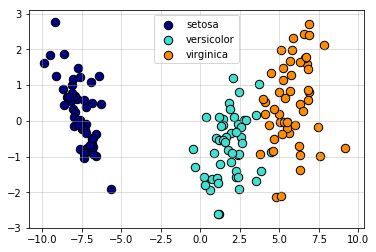

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
lda = lda(n_components=2)
t0 = time()
X_lda = lda.fit(data, labels).transform(data)
t1 = time()
print(t1 - t0)
pl_sc(target_ids, X_lda)

## Principal Components Analysis (PCA)
- The next method that we are going to look at is involved in computing transformations of the data in order to identify a lower-dimensional set of axes.
- PCA looks for dimensions of greatest variance.

We have a data matrix $X$ and we want to rotate it so
that the data lies along the directions of maximum variation. This means that we multiply our data matrix by a rotation matrix (often written as $P^T$ ) so that $Y = P^T X$, where $P$ is chosen so that the covariance matrix of $Y$ is diagonal, ie.,


\begin{align}
cov(Y)= cov(P^{T}X)=\begin{pmatrix}
\lambda_1 & 0 & 0 & ... & 0\\
   0 & \lambda_2 & 0 & ... & 0\\
   ... & ... & ... & ... & ...\\
   0 & 0 & 0 & ... & \lambda_N
\end{pmatrix} .
\end{align}


\begin{align}
cov(Y) &= E[YY^T] \\
&= E[(P^{T}X)(P^{T}X)^T] \\
&= E[(P^{T}X)(X^{T}P)] \\
&= P^{T}E(XX^T)P \\
&= P^{T}cov(X)P \\
Pcov(Y) &= PP^{T}cov(X)P \\
Pcov(Y) &= cov(X)P \\
\end{align}

As $cov(Y)$ is diagonal, if we write $P$ as a set of column vectors $P = [p_1 , p_2 , . . . , p_N]$ then:


\begin{align} 
Pcov(Y) &= [\lambda_1 p_1, \lambda_2 p_2,...\lambda_N p_N], 
\end{align} 


which (by writing the $\lambda$ variables in a matrix as $\lambda = (\lambda_1, \lambda_2,...,\lambda_N)^T$ and $Z = cov(X))$ leads to a very interesting equation:

\begin{align} 
\lambda p_i = Zpi \text{ for each } p_i.
\end{align} 

Since $\lambda$ is only a column vector, all it does is rescale the $p_i s$; it cannot
rotate it or do anything complicated like that. So this tells us that somehow we have found
a matrix $P$ so that for the directions that $P$ is written in, the matrix $Z$ does not twist
or rotate those directions, but just rescales them. These directions are special enough that
they have a name: they are $eigenvectors$, and the amount that they rescale the axes (the
$\lambda_s$) by are known as eigenvalues.

If we make a matrix $E$ that contains the (normalised)
eigenvectors of a matrix $A$ as columns, then this matrix will take any vector and rotate
it into what is known as the eigenspace. Since $E$ is a rotation matrix, $E^{-1} = E^T$ , so that
rotating the resultant vector back out of the eigenspace requires multiplying it by $E^T$ , where
by ‘normalised’, I mean that the eigenvectors are made unit length. So what should we do
between rotating the vector into the eigenspace, and rotating it back out? The answer is
that we can stretch the vectors along the axes. This is done by multiplying the vector by a diagonal matrix that has the eigenvalues along its diagonal, $D$. So we can decompose any
square symmetric matrix A into the following set of matrices: $A = EDE^T$ , and this is what
we have done to our covariance matrix above. This is called the spectral decomposition.

In [13]:
iris = datasets.load_iris()
data = iris.data
labels = iris.target
Ndata = np.shape(data)[0]
target_ids=[0,1,2]
print data[:5]

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


### The Principal Components Analysis Algorithm

- Write $N$ datapoints $x_i = (x_{1i} , x_{2i} , . . . , x_{Mi} )$ as row vectors
- Put these vectors into a matrix $X$ (which will have size $N × M$ )
- Centre the data by subtracting off the mean of each column, putting it into matrix $B$

In [14]:
m = np.mean(data, axis=0)
data -=m
print m

[5.84333333 3.054      3.75866667 1.19866667]


- Compute the covariance matrix $C =\frac{1}{N-1}B^TB$

In [15]:
C = np.cov(data.T)
print data.T.shape, data.shape, '\n'
print np.matmul(data.T, data)/(np.shape(data)[0] - 1)
print C

(4, 150) (150, 4) 

[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]
[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]


- Compute the eigenvalues and eigenvectors of $C$, so $V^{−1} CV = D$, where $V$ holds the
eigenvectors of $C$ and $D$ is the $M × M$ diagonal eigenvalue matrix
- Sort the columns of $D$ into order of decreasing eigenvalues, and apply the same order
to the columns of $V$
- Reject those with eigenvalue less than some $\eta$, leaving $L$ dimensions in the data


In [16]:
evals,evecs = np.linalg.eig(C)
print evals
indices = np.argsort(evals)
indices = indices[::-1]
evecs = evecs[:,indices]
evals = evals[indices]
print indices, evals 
print evecs


[4.22484077 0.24224357 0.07852391 0.02368303]
[0 1 2 3] [4.22484077 0.24224357 0.07852391 0.02368303]
[[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]


In [17]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='|S10')

evecs.T: 
[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [-0.65653988 -0.72971237  0.1757674   0.07470647]
 [-0.58099728  0.59641809  0.07252408  0.54906091]
 [ 0.31725455 -0.32409435 -0.47971899  0.75112056]]
data.T: 
[[-0.74333333 -0.94333333 -1.14333333 -1.24333333 -0.84333333]
 [ 0.446      -0.054       0.146       0.046       0.546     ]
 [-2.35866667 -2.35866667 -2.45866667 -2.25866667 -2.35866667]
 [-0.99866667 -0.99866667 -0.99866667 -0.99866667 -0.99866667]]
n.T:
[[-2.68420713e+00 -3.26607315e-01 -2.15118370e-02  1.00615724e-03]
 [-2.71539062e+00  1.69556848e-01 -2.03521425e-01  9.96024240e-02]
 [-2.88981954e+00  1.37345610e-01  2.47092410e-02  1.93045428e-02]
 [-2.74643720e+00  3.11124316e-01  3.76719753e-02 -7.59552741e-02]
 [-2.72859298e+00 -3.33924564e-01  9.62296998e-02 -6.31287327e-02]]


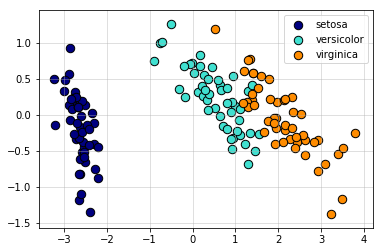

In [18]:
#Produce the new data matrix
n = np.dot(evecs.T, data.T) 
print 'evecs.T: \n',evecs.T
print 'data.T: \n',data.T[:,:5]
print 'n.T:\n',n.T[:5,:]

pl_sc(target_ids, n.T)

In [19]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True)
pca.fit(X)
X_pca = pca.transform(X)

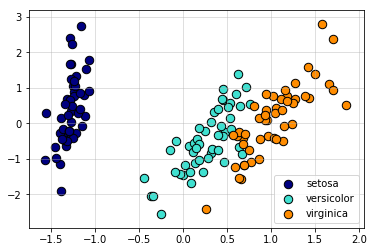

In [20]:
pl_sc(target_ids, X_pca)

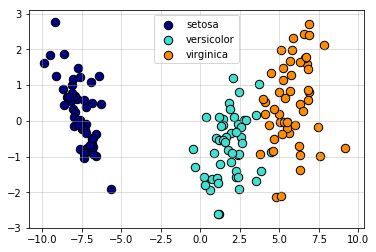

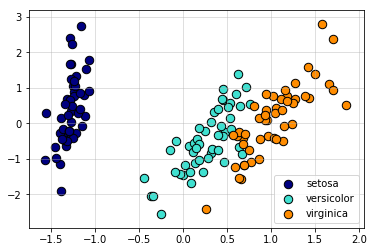

In [21]:
plt.subplot(111)
pl_sc(target_ids, X_lda)


plt.subplot(111)
pl_sc(target_ids, X_pca)


### Kernel PCA

- One problem with PCA is that it assumes that the directions of variation are all straight
lines. This is often not true. There is a very nice extension to PCA that uses the kernel trick.

We apply a (possibly non-linear) function $\phi(\cdot)$ to each
datapoint $x$ that transforms the data into the kernel space, and then perform normal linear
PCA in that space. 

In [22]:
from sklearn.decomposition import KernelPCA
transformer_p = KernelPCA(n_components=2, kernel='poly')
KP = transformer_p.fit_transform(iris.data)
KP.shape

transformer_r = KernelPCA(n_components=2, kernel='rbf')
KR = transformer_r.fit_transform(iris.data)
KR.shape

transformer_s = KernelPCA(n_components=2, kernel='cosine')
KS = transformer_s.fit_transform(iris.data)
KS.shape

(150, 2)

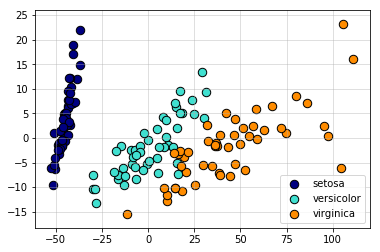

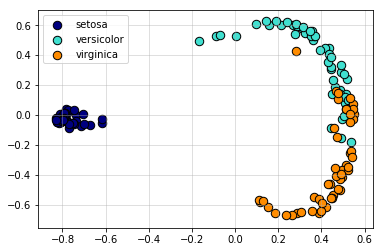

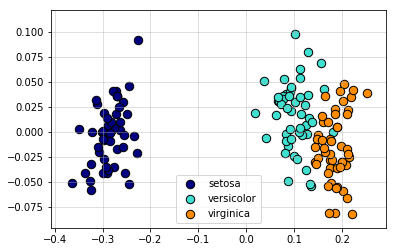

In [23]:
plt.subplot(111)
pl_sc(target_ids, KP)

plt.subplot(111)
pl_sc(target_ids, KR)

plt.subplot(111)
pl_sc(target_ids, KS)

## Locally Linear Embedding

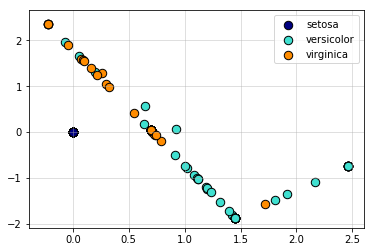

In [24]:
import warnings
warnings.filterwarnings('ignore')
import pylab as pl
import numpy as np

def lle(data,nRedDim=2,K=3):

	ndata = np.shape(data)[0]
	ndim = np.shape(data)[1]
	d = np.zeros((ndata,ndata),dtype=float)
	
	# Inefficient -- not matrices
	for i in range(ndata):
		for j in range(i+1,ndata):
			for k in range(ndim):
				d[i,j] += (data[i,k] - data[j,k])**2
			d[i,j] = np.sqrt(d[i,j])
			d[j,i] = d[i,j]

	indices = d.argsort(axis=1)
	neighbours = indices[:,1:K+1]

	W = np.zeros((K,ndata),dtype=float)

	for i in range(ndata):
		Z  = data[neighbours[i,:],:] - np.kron(np.ones((K,1)),data[i,:])
		C = np.dot(Z,np.transpose(Z))
		C = C+np.identity(K)*22e-2*np.trace(C)
		W[:,i] = np.transpose(np.linalg.solve(C,np.ones((K,1))))
		W[:,i] = W[:,i]/np.sum(W[:,i])

	M = np.eye(ndata,dtype=float)
	for i in range(ndata):
		w = np.transpose(np.ones((1,np.shape(W)[0]))*np.transpose(W[:,i]))
		j = neighbours[i,:]
		#print shape(w), np.shape(np.dot(w,np.transpose(w))), np.shape(M[i,j])
		ww = np.dot(w,np.transpose(w))
		for k in range(K):
			M[i,j[k]] -= w[k]
			M[j[k],i] -= w[k]
			for l in range(K):
			     M[j[k],j[l]] += ww[k,l]
	
	evals,evecs = np.linalg.eig(M)
	ind = np.argsort(evals)
	y = evecs[:,ind[1:nRedDim+1]]*np.sqrt(ndata)
	return evals,evecs,y


evals,evecs,y = lle(iris.data)

pl_sc(target_ids, y)

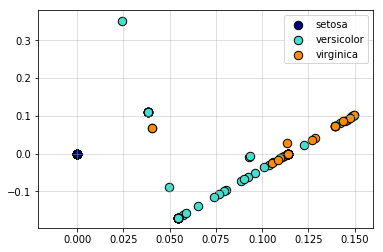

In [25]:
from sklearn.manifold import LocallyLinearEmbedding
labels = iris.target
embedding = LocallyLinearEmbedding(3, n_components=2)
X_lle = embedding.fit_transform(iris.data)
target_ids = np.unique(labels)
y = iris.target
X_lle.shape
(100, 2)

pl_sc(target_ids, X_lle)

## Isomap

- Tries to minimise the global error by looking at all of the pairwise distances and computing global geodesics.
It is a variant of the standard multi-dimensional scaling (MDS) algorithm.

In [26]:
from sklearn import manifold

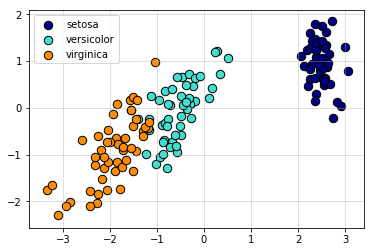

In [27]:
iris = datasets.load_iris()
mds = manifold.MDS(2, max_iter=100, n_init=1)
trans_data = mds.fit_transform(iris.data)
trans_data.shape

pl_sc(target_ids, trans_data)

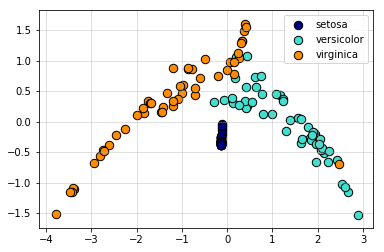

In [28]:
trans_data = manifold.Isomap(4, n_components=2).fit_transform(iris.data)

pl_sc(target_ids, trans_data)

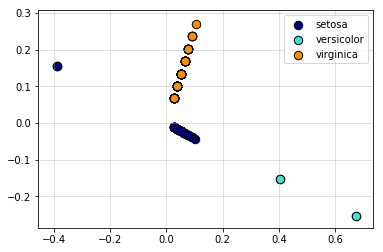

In [29]:
se = manifold.SpectralEmbedding(n_components=2,
                                n_neighbors=3)
trans_data = se.fit_transform(iris.data)

pl_sc(target_ids, trans_data)

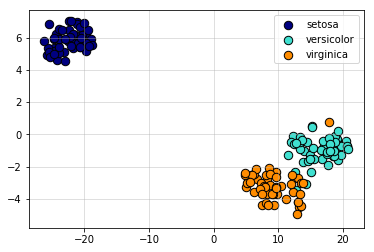

In [30]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
trans_data = tsne.fit_transform(iris.data)

pl_sc(target_ids, trans_data)

## References
[
Machine Learning: An Algorithmic Perspective: Stephen Marsland ](http://dai.fmph.uniba.sk/courses/ICI/References/marsland.machine-learning.2ed.2015.pdf)